In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/enem_2020.csv", low_memory=False, encoding="ISO-8859-1")

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_ANO                  int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_NACIONALIDADE        int64  
 6   TP_ST_CONCLUSAO         int64  
 7   TP_ANO_CONCLUIU         int64  
 8   TP_ESCOLA               int64  
 9   IN_TREINEIRO            int64  
 10  NO_MUNICIPIO_ESC        object 
 11  SG_UF_ESC               object 
 12  TP_DEPENDENCIA_ADM_ESC  float64
 13  TP_LOCALIZACAO_ESC      float64
 14  TP_PRESENCA_CN          int64  
 15  TP_PRESENCA_CH          int64  
 16  TP_PRESENCA_LC          int64  
 17  TP_PRESENCA_MT          int64  
 18  NU_NOTA_CN              float64
 19  NU_NOTA_CH              float64
 20  NU_NOTA_LC              float64
 21  NU_NOTA_MT              float64

# Classificação de Cor/raça
    0	Não declarado
	1	Branca
	2	Preta
	3	Parda
	4	Amarela
	5	Indígena 
	6	Não dispõe da informação

In [11]:
#Alteração dos dados de acordo com as colunas
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(lambda x: '0. Não Declarado' if x == 0 else '1. Branca' if x == 1 else '2. Preta' if x == 2 else '3. Parda' if x == 3 else '4. Amarela' if x == 4 else '5. Indígena' if x == 5 else 'ND')

In [18]:
df_CR = df[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].groupby('TP_COR_RACA').median()

df_CR

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_COR_RACA,,,,,
0. Não Declarado,494.60,523.1,535.6,514.2,580.0
1. Branca,514.20,543.9,552.3,555.2,600.0
2. Preta,462.85,488.9,515.8,469.3,540.0
3. Parda,468.10,492.7,515.4,480.4,560.0
4. Amarela,481.30,504.0,524.7,499.6,560.0
5. Indígena,443.60,459.9,486.5,443.1,520.0


In [19]:
df_CR = df[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].groupby('TP_COR_RACA').mean()

df_CR

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_COR_RACA,,,,,
0. Não Declarado,499.753735,521.587856,528.776483,530.648378,572.011013
1. Branca,513.138284,537.896000,545.280582,557.581817,615.317472
2. Preta,470.630413,490.591104,509.737405,486.333419,534.547511
3. Parda,476.590991,494.730049,510.154313,498.769648,550.088065
4. Amarela,491.031908,505.755038,519.724859,522.535492,571.479592
5. Indígena,453.359888,466.356655,482.014634,462.914159,488.583782


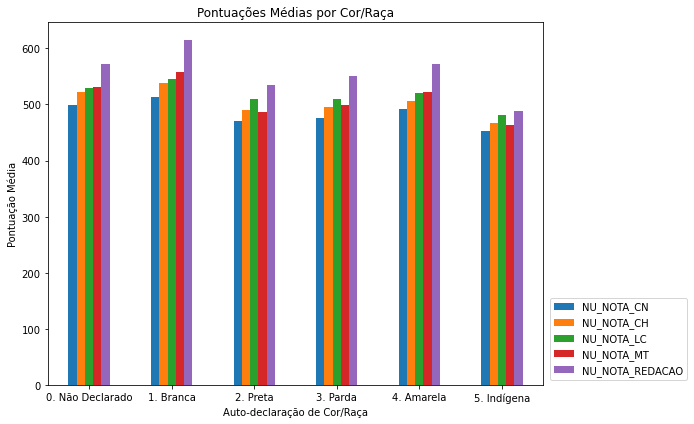

In [20]:
import matplotlib.pyplot as plt

ax = df_CR.plot.bar(rot=0, figsize=(10, 6))
ax.set_xlabel('Auto-declaração de Cor/Raça')
ax.set_ylabel('Pontuação Média')
ax.set_title('Pontuações Médias por Cor/Raça')

ax.legend(loc='lower right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

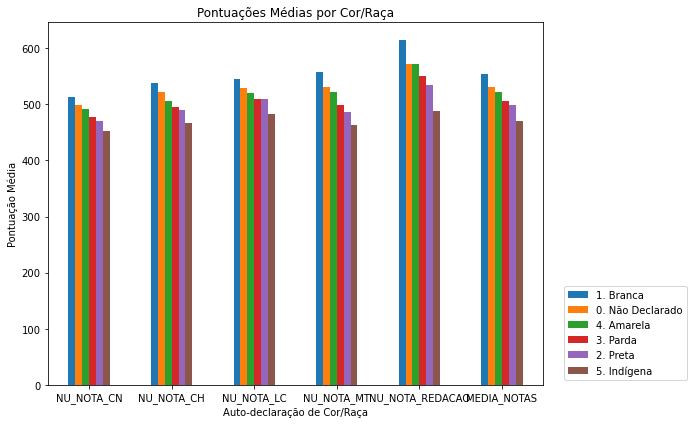

In [24]:
import matplotlib.pyplot as plt

transposed_df_CR = df_CR.transpose()

ax = transposed_df_CR.plot.bar(rot=0, figsize=(10, 6))
ax.set_xlabel('Auto-declaração de Cor/Raça')
ax.set_ylabel('Pontuação Média')
ax.set_title('Pontuações Médias por Cor/Raça')

ax.legend(loc='lower right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

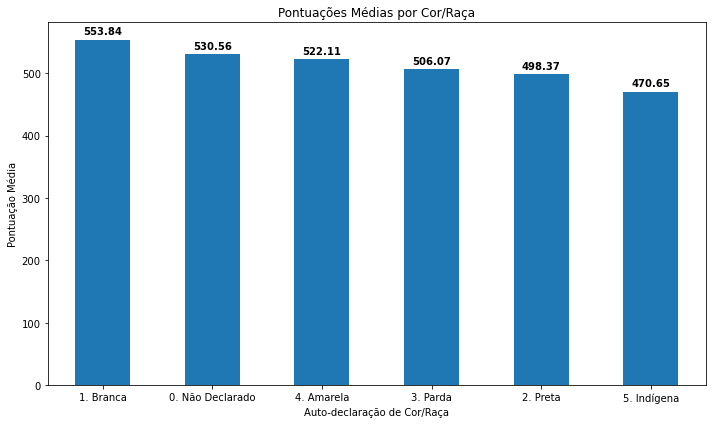

In [21]:
df_CR['MEDIA_NOTAS'] = df_CR[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

df_CR = df_CR.sort_values(by = 'MEDIA_NOTAS', ascending = False)

ax = df_CR['MEDIA_NOTAS'].plot.bar(rot=0, figsize=(10, 6))
ax.set_xlabel('Auto-declaração de Cor/Raça')
ax.set_ylabel('Pontuação Média')
ax.set_title('Pontuações Médias por Cor/Raça')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


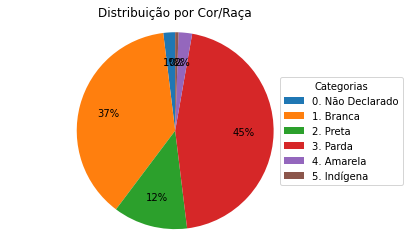

In [22]:
df_CR_count = df[['TP_COR_RACA', 'NU_NOTA_REDACAO']].groupby('TP_COR_RACA').count()

fig, ax = plt.subplots()
ax.pie(df_CR_count['NU_NOTA_REDACAO'], autopct='%d%%', startangle=90, pctdistance=0.7)
ax.axis('equal')

plt.title('Distribuição por Cor/Raça')

ax.legend(df_CR_count.index, title='Categorias', loc='center left', bbox_to_anchor=(0.8, 0.5))

plt.show()

In [23]:
df_CR_count.rename(columns={'NU_NOTA_REDACAO': 'PRESENTES_REDACAO'}, inplace=True)

df_CR_count['PERCENTUAL'] = (df_CR_count['PRESENTES_REDACAO'] / df_CR_count['PRESENTES_REDACAO'].sum()) * 100

df_CR_count

,PRESENTES_REDACAO,PERCENTUAL
TP_COR_RACA,,
0. Não Declarado,53391,1.938572
1. Branca,1041053,37.799567
2. Preta,336019,12.200505
3. Parda,1247492,45.295156
4. Amarela,61152,2.220366
5. Indígena,15033,0.545833


Distribuições semelhantes à autodeclaração geral no Brasil no IBGE:
https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html